Общие замечания по домашней работе.

- Почти все забыли в списке однокурсников поменять Олега Бушуева на Орлана :) 
- Многие в задании про фамилию с наибольшим количеством уникальных букв получили результат "Суван-оол". Однако, забыли, что дефис - это не буква. 
- **Внимательно следите за названиями переменных. Были случаи, когда я перезапускал код и выдавалась ошибка, что такой переменной нет.**
- ***Не нужно бездумно копировать код от другого человека. Это сразу видно и за это ставится 0.Как минимум, хотя бы уберите все, без чего можно обойтись. Другими словами, можно убрать код, без которого будет все равно получен верный результат. Также хотя бы еще переменные называйте другим именем. Чтобы было понятно, что несмотря на то, что основную идею решения вы скопипастили, вы хотя бы поняли, что происходит.***
- Когда вы пишете код, где куча циклов for, подумайте, а можно ли упростить это? В питоне очень много способов обойти такие циклы. 
- Внимательно читайте тетрадки из лекций. 
- Начинаем гуглить, если: 1) в тетрадках нет ответа 2) вы точно не знаете, сможете ли сразу найти в решение на stack overflow 
- Не нужно ставить пробелы перед скобками. print(x) вместо print (x)
- Удаляйте куски кода, которые выдавали ошибку (если это не непосредственное решение)
- Если вы применяете параметрический тест, то нужно проверить все его предпосылки
- Мало кто нашел несмещенную оценку дисперсии и стандартного отклонения

Мой косяк по проверке - я кому-то написал, что не использованы все признаки в kNN. Поставьте себе 10 баллов, так как это неправильное замечание.

In [1]:
# Отключаем предупреждения анаконды
import warnings
warnings.filterwarnings("ignore")

# Часть 1. Строковый тип данных и функции

**Задание 1**. Тайна моего имени. (10 баллов)

Напишите функцию, где на вход подается ваше ФИО (на русском и с пробельными разделителями) и которая в качестве результата выдает следующее:
- количество букв
- частоту букв (словарик с тем, сколько раз каждая буква встречается)
- факториал числа, равному длине фамилии
- факториал числа, равному длине имени
- модуль разности факториалов чисел от длины имени и фамилии


In [2]:
fio = "Якубовский Игорь Владимирович"
fio_ = fio.replace(" ", "").lower()
# Количество букв
count_letters = len(fio_)
# Частота методом Counter
from collections import Counter
Counter(fio_)
# Частота без Counter
dict_count = dict(zip(fio_, [fio_.count(i) for i in fio_]))
# Факториал числа длины Фамилии (math)
from math import factorial
factorial(len(fio.split(" ")[0]))
# Факториал числа длины Фамилии через reduce
from functools import reduce
#Reduce
product = reduce((lambda x, y: x * y), [i+1 for i in range(len(fio.split(" ")[0]))])
print(f"result of reduce: {product}")

# Факториал длины имени
factorial(len(fio.split(" ")[1]))
abs(factorial(len(fio.split(" ")[1])) - factorial(len(fio.split(" ")[0])))

result of reduce: 3628800


3628680

In [3]:
# Обернем в функцию
def task_1(fio):
    fio_ = fio.replace(" ", "").lower()
    
    # Количество букв
    count_letters = len(fio_)
    
    # Частота методом Counter
    
    from collections import Counter
    dict_count = Counter(fio_)
    
    # Частота без Counter
    dict_count = dict(zip(fio_, [fio_.count(i) for i in fio_]))
    
    # Факториал числа длины Фамилии (math)
    from math import factorial
    fact_len_f = factorial(len(fio.split(" ")[0]))
    
    # Факториал числа длины Фамилии через reduce
    from functools import reduce
    #Reduce
    fact_len_f = reduce((lambda x, y: x * y), [i+1 for i in range(len(fio.split(" ")[0]))])
    
    # Факториал длины имени
    fact_len_i = factorial(len(fio.split(" ")[1]))
    
    # Разница 
    diff_f_i = abs((fact_len_i - fact_len_f))
    return(count_letters, dict_count, fact_len_f, fact_len_i, diff_f_i)
task_1("Якубовский Игорь Владимирович")
                

(27,
 {'я': 1,
  'к': 2,
  'у': 1,
  'б': 1,
  'о': 3,
  'в': 3,
  'с': 1,
  'и': 5,
  'й': 1,
  'г': 1,
  'р': 2,
  'ь': 1,
  'л': 1,
  'а': 1,
  'д': 1,
  'м': 1,
  'ч': 1},
 3628800,
 120,
 3628680)

**Задание 2**. Тайна имен однокурсников (10 баллов)

В этом задании нужно использовать список всех однокурсников. Ваша задача вывести:
- самое короткое ФИО (без пробелов)
- самое длинное ФИО (без пробелов)
- самое популярное ИМЯ
- фамилию, где используется наибольшее количество уникальных букв (если таких несколько, то весь список)
- разницу между длиной собственого ФИО (разделители - пробелы) и самого длинного ФИО (с разделители - пробелы)

In [4]:
import pandas as pd
import numpy as np
# Путь к файлу
your_path_to_file = "/Users/iakubovskii/Machine_Learning/RANEPA"
# Импорт файла со списком однокурсников
finteh = list(pd.read_excel(
    your_path_to_file + "/ФинТех-05-20.xlsx")['ФИО'])
finteh

['Базуева Мария Дмитриевна',
 'Бориско Данила Ильич ',
 'Братков Герман Сергеевич',
 'Суван-оол Орлан Владимирович',
 'Валл Федор Викторович',
 'Гарбузов Иван Константинович',
 'Евменов Максим Андреевич',
 'Егорова Анна Сергеевна ',
 'Едовина Алина Игоревна',
 'Загарнюк Елизавета Максимовна',
 'Захаров Алексей Сергееивч',
 'Калёнов Алексей Аркадьевич',
 'Карасева Алина Александровна',
 'Каширин Егор Михайлович',
 'Косинов Андрей Вячеславович',
 'Красиков Евгений Владимирович',
 'Кузьмин Никита Кириллович',
 'Монгуш Тенгиз Анатольевич',
 'Мурадян Акоп Араратович',
 'Наумова Анастасия Юрьевна',
 'Панчук Александр Сергеевич',
 'Пашинина Татьяна Викторовна',
 'Пустоваров Артем Андреевич',
 'Селезнев Дмитрий Владимирович',
 'Сидорякин Виталий Дмитриевич',
 'Филиппов Антон Павлович',
 'Фрольцов Григорий Максимович',
 'Хамитов Давид Альбертович',
 'Хомушку Ганна Алексеевна',
 'Царева Мария Сергеевна']

In [10]:
fam_list = list(map(lambda x: x.split(" ")[0].lower(), finteh))


In [18]:
unique_count_letters = list(map(lambda x: len(set([i for i in x])), fam_list))

In [35]:
def task_2(finteh):
    # Удалим лишние пробелы в конце ФИО через strip
    finteh_list = list(map(lambda x: x.strip(" "), finteh))

    # Удалим лишние пробелы в конце ФИО через replace
    finteh_list = list(map(lambda x: x.replace(" ",""), finteh))

    # Найдем самое короткое ФИО

    # Массив с длинами ФИО
    len_fio = list(map(len, finteh_list))
    # Минимальная длина
    min_len = min(len_fio)
    shortest_fio = [i for i in finteh_list if len(i)==min_len]


    # Найдем самое длинное ФИО
    max_len = max(len_fio)
    longest_fio = [i for i in finteh_list if len(i)==max_len]

    # Найдем самое популярное имя
    names_list = list(map(lambda x: x.split(" ")[1], finteh))

    # Массив с частотой имен
    count_names = [names_list.count(i) for i in names_list]
    dict_count_names = dict(zip(names_list, count_names))
    popular_names = {k: v for k, v in dict_count_names.items() if v == 2}

    # Уникальные буквы
    # Список с фамилиями
    fam_list = list(map(lambda x: x.split(" ")[0].lower(), finteh))
    # Трешовое и длинное решение
#     # Буквы, которые встречаются один раз
#     fam_unique_list = list(map(lambda x: [i for i in x if x.count(i)==1], fam_list))
#     fam_unique_list_len = list(map(len, fam_unique_list))

#     # Буквы, которые встречаются больше 1 раза
#     fam_non_unique_list = list(map(lambda x: list(set([i for i in x if x.count(i)>1])), fam_list))
#     fam_non_unique_list_len = list(map(len, fam_non_unique_list))
#     # Склыдываем поэлементно эти два массива

#     fam_unique_letters_list = list(map(lambda x,y: x+y, fam_unique_list_len, fam_non_unique_list_len))
#     dict_fam_len = dict(zip(fam_list, fam_unique_letters_list))
#     unique_fams = {k: v for k, v in dict_fam_len.items() if v == max(fam_unique_letters_list)}
    # Короткое решение
    unique_count_letters = list(map(lambda x: len(set([i for i in x])), fam_list))
    unique_fams_dict = dict(zip(fam_list, unique_count_letters))
    unique_fams = {k: v for k, v in unique_fams_dict.items() if v == max(unique_fams_dict.values())}
    
    # Разница между ФИО и самым длинным именем
    diff_fio_longest = len("Якубовский Игорь Владимирович") - max_len
    
    return(shortest_fio, longest_fio, popular_names, unique_fams, diff_fio_longest)
task_2(finteh)


(['БорискоДанилаИльич'],
 ['ЗагарнюкЕлизаветаМаксимовна',
  'КрасиковЕвгенийВладимирович',
  'СелезневДмитрийВладимирович'],
 {'Мария': 2, 'Алина': 2, 'Алексей': 2},
 {'суван-оол': 8, 'гарбузов': 8, 'пустоваров': 8, 'сидорякин': 8},
 2)

**Задание 3**. Беговая дорожка. (10 баллов)

Когда я занимаюсь на беговой дорожке, меня часто волнует то, за какое время я пробегу необходимое количество километров при заданной средней скорости (км в час). Ваша задача написать функцию, где на вход подается: 
- количество километров, которое человек планирует пробежать (целое число от 1 до 40)
- средняя скорость, которая задается на беговой дорожке в км / час (целое число от 1 до 20)

Функция должна вывести время (в минутах и секундах) за которое человек пробежит данное количество километров при заданной скорости беговой дорожки.

Пример. Я ставлю себе скорость в 10 км в час. За какое время в минутах и секундах я пробегу 2 км? 

In [37]:
def run(distance, speed):
    speed_m_s = (speed * 1000) / 3600
    distance_m = distance * 1000
    result_s = distance_m / speed_m_s
    result_mins = int(result_s // 60)
    result_sec = int(result_s % 60)
    return(result_mins, result_sec)
run(1, 14)

(4, 17)

## Часть 2. Прикладная статистика

Для этой части необходимо подгрузить данные с результатами олимпийских игр. Подгружаем через *pandas*, однако все задания необходимо выполнить при помощи пакетов *numpy* и *scipy*. Использовать *pandas* кроме импорта, экспорта файлов и заполнения пропусков в этом ДЗ **запрещено**!


In [39]:
# Посмотреть рабочую директорию
import os
os.getcwd()

'/Users/iakubovskii/Machine_Learning/RANEPA/DataAnalize_ipynb/ДЗ1'

In [38]:
import pandas as pd
# your_path_to_file = "/Users/iakubovskii/Machine_Learning/Datasets/olympic_games/"
data = pd.read_csv("athlete_events.csv").drop("Medal", axis=1)
# В данном датасете присутствуют пропуски среди количественных переменных (Age, Height, Weight)
# Заполним их медианами 
for col in data.select_dtypes("float").columns:
    data[col] = data[col].fillna(data[col].median())

# Все, пандас больше не используем в этой домашке :) Переходим к numpy
import numpy as np
og, og_names = data.values, data.columns

# Словарик с номерами столбцов и соответствующими именами
dict_names = {og_names[key]: key for key in range(len(og_names))}
# Столбцы датасета
print(dict_names)

{'ID': 0, 'Name': 1, 'Sex': 2, 'Age': 3, 'Height': 4, 'Weight': 5, 'Team': 6, 'NOC': 7, 'Games': 8, 'Year': 9, 'Season': 10, 'City': 11, 'Sport': 12, 'Event': 13}


In [145]:
# Посмотрим на все города в данном датасете, где проходила олимпиада
np.unique(og[:, dict_names["City"]])

array(['Albertville', 'Amsterdam', 'Antwerpen', 'Athina', 'Atlanta',
       'Barcelona', 'Beijing', 'Berlin', 'Calgary', 'Chamonix',
       "Cortina d'Ampezzo", 'Garmisch-Partenkirchen', 'Grenoble',
       'Helsinki', 'Innsbruck', 'Lake Placid', 'Lillehammer', 'London',
       'Los Angeles', 'Melbourne', 'Mexico City', 'Montreal', 'Moskva',
       'Munich', 'Nagano', 'Oslo', 'Paris', 'Rio de Janeiro', 'Roma',
       'Salt Lake City', 'Sankt Moritz', 'Sapporo', 'Sarajevo', 'Seoul',
       'Sochi', 'Squaw Valley', 'St. Louis', 'Stockholm', 'Sydney',
       'Tokyo', 'Torino', 'Vancouver'], dtype=object)

In [146]:
# Посмотрим на все уникальные виды спорта
np.unique(og[:, dict_names['Event']])

array(['Aeronautics Mixed Aeronautics', "Alpine Skiing Men's Combined",
       "Alpine Skiing Men's Downhill", "Alpine Skiing Men's Giant Slalom",
       "Alpine Skiing Men's Slalom", "Alpine Skiing Men's Super G",
       "Alpine Skiing Women's Combined", "Alpine Skiing Women's Downhill",
       "Alpine Skiing Women's Giant Slalom",
       "Alpine Skiing Women's Slalom", "Alpine Skiing Women's Super G",
       'Alpinism Mixed Alpinism', "Archery Men's Au Chapelet, 33 metres",
       "Archery Men's Au Chapelet, 50 metres",
       "Archery Men's Au Cordon Dore, 33 metres",
       "Archery Men's Au Cordon Dore, 50 metres",
       "Archery Men's Championnat Du Monde",
       "Archery Men's Continental Style",
       "Archery Men's Double American Round",
       "Archery Men's Double York Round", "Archery Men's Individual",
       "Archery Men's Pole Archery, Large Birds, Individual",
       "Archery Men's Pole Archery, Large Birds, Team",
       "Archery Men's Pole Archery, Small Birds, In

In [147]:
# Посмотрим  на средний возраст мужчин в беге на 100 метров
og[og[:, dict_names["Event"]] == "Athletics Men's 100 metres", 
         dict_names['Age']
  ].mean()

23.848140495867767

In [148]:
# Посмотрим на уникальные годы проведения олимпиады
for year in np.unique(og[:, dict_names["Year"]]):
    print(year, " ", f" {og[og[:, dict_names['Year']] == year].shape[0]} строк")

1896    380 строк
1900    1936 строк
1904    1301 строк
1906    1733 строк
1908    3101 строк
1912    4040 строк
1920    4292 строк
1924    5693 строк
1928    5574 строк
1932    3321 строк
1936    7401 строк
1948    7480 строк
1952    9358 строк
1956    6434 строк
1960    9235 строк
1964    9480 строк
1968    10479 строк
1972    11959 строк
1976    10502 строк
1980    8937 строк
1984    11588 строк
1988    14676 строк
1992    16413 строк
1994    3160 строк
1996    13780 строк
1998    3605 строк
2000    13821 строк
2002    4109 строк
2004    13443 строк
2006    4382 строк
2008    13602 строк
2010    4402 строк
2012    12920 строк
2014    4891 строк
2016    13688 строк


Как видим, объем данных для каждой олимпиады несколько различается. Поэтому будем анализировать олимпиады, начиная с 1912 года (более 4000 строк данных и более для каждой).
У каждого персонально будет свой год, для которого он будет выполнять  задания 4-10
Данный год будет выбираться рандомно в конце лекции. (Если в данный год было две олимпиады, то выбираем летнюю)

In [149]:
all_years = np.unique(og[:, dict_names['Year']])[5:]
np.random.shuffle(all_years)
import os
os.chdir("/Users/iakubovskii/Machine_Learning/RANEPA/")
finteh_list = pd.read_excel("ФинТех-05-20.xlsx").rename(columns = {"Unnamed: 0":"index"})
finteh_list_names = np.array(finteh_list['ФИО'])
np.random.shuffle(finteh_list_names)
students_years_list = list(zip(finteh_list_names, all_years))
students_years_list

[('Гарбузов Иван Константинович', 1960),
 ('Филиппов Антон Павлович', 1964),
 ('Сидорякин Виталий Дмитриевич', 1980),
 ('Егорова Анна Сергеевна ', 1912),
 ('Каширин Егор Михайлович', 1998),
 ('Красиков Евгений Владимирович', 2006),
 ('Калёнов Алексей Аркадьевич', 1956),
 ('Монгуш Тенгиз Анатольевич', 1952),
 ('Пустоваров Артем Андреевич', 2012),
 ('Валл Федор Викторович', 2002),
 ('Суван-оол Орлан Владимирович', 1996),
 ('Хомушку Ганна Алексеевна', 1932),
 ('Хамитов Давид Альбертович', 2004),
 ('Базуева Мария Дмитриевна', 1992),
 ('Царева Мария Сергеевна', 1948),
 ('Селезнев Дмитрий Владимирович', 1984),
 ('Мурадян Акоп Араратович', 1928),
 ('Панчук Александр Сергеевич', 1936),
 ('Пашинина Татьяна Викторовна', 1976),
 ('Евменов Максим Андреевич', 2008),
 ('Едовина Алина Игоревна', 1994),
 ('Бориско Данила Ильич ', 1972),
 ('Кузьмин Никита Кириллович', 1924),
 ('Фрольцов Григорий Максимович', 2016),
 ('Косинов Андрей Вячеславович', 2010),
 ('Загарнюк Елизавета Максимовна', 2014),
 ('Нау

In [40]:
# Ваш датафрейм:
year = 2016
df = og[og[:, dict_names["Year"]] == year]

**Задание 4**. Описательные статистики (10 баллов)
- Вычислите средние, дисперсии и стандартные отклонения (несмещенные) для всех количественных признаков
- Вычислите коэффициент корреляции между ростом и весом спортсменов
- Найдите самого высокого и самого худого спортсменов олимпиады (имя и фамилия, вид спорта)
- Выведите 5%, 10%, 25%, 50%, 75% и 95% квантили распределения веса спортсменов отдельно для мужчин и отдельно для женщин. Проинтерпретируйте.
- Выведите наиболее и наименее популярные в выборке виды спорта (больше и меньше всего участников)

In [85]:
data.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event'],
      dtype='object')

In [165]:
dict_names

{'ID': 0,
 'Name': 1,
 'Sex': 2,
 'Age': 3,
 'Height': 4,
 'Weight': 5,
 'Team': 6,
 'NOC': 7,
 'Games': 8,
 'Year': 9,
 'Season': 10,
 'City': 11,
 'Sport': 12,
 'Event': 13}

In [42]:
# Создадим словарик, где ключ - это индекс, а значение - название столбца
dict_names_reverse = {v:k for k,v in  dict_names.items()}

In [43]:
def desc_stats(number):
    x = df[:, number]
    print(f"Выборочное среднее для переменной {dict_names_reverse[number]} = {x.mean()}")
    print(f"Выборочная дисперсия генеральной совокупности (несмещенная) для переменной {dict_names_reverse[number]} = {x.var(ddof = 1)}")
    print(f"Выборочное стандартное отклонение генеральной совокупности (несмещенное) для переменной {dict_names_reverse[number]} отклонение = {x.std(ddof = 1)}")
    return
desc_stats(3)
print("-"*100)
desc_stats(4)
print("-"*100)
desc_stats(5)
print("-"*100)

Выборочное среднее для переменной Age = 26.20791934541204
Выборочная дисперсия генеральной совокупности (несмещенная) для переменной Age = 30.91767820143403
Выборочное стандартное отклонение генеральной совокупности (несмещенное) для переменной Age отклонение = 5.560366732638597
----------------------------------------------------------------------------------------------------
Выборочное среднее для переменной Height = 176.020967270602
Выборочная дисперсия генеральной совокупности (несмещенная) для переменной Height = 129.21012511093423
Выборочное стандартное отклонение генеральной совокупности (несмещенное) для переменной Height отклонение = 11.367063170007205
----------------------------------------------------------------------------------------------------
Выборочное среднее для переменной Weight = 70.97253068381063
Выборочная дисперсия генеральной совокупности (несмещенная) для переменной Weight = 242.95577347389153
Выборочное стандартное отклонение генеральной совокупности (несм

In [44]:
df[:, 4].reshape(-1, 1)

array([[170.0],
       [167.0],
       [167.0],
       ...,
       [174.0],
       [174.0],
       [171.0]], dtype=object)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 29.0+ MB


In [46]:
# Корреляция между ростом и весом
np.corrcoef(df[:, 4].astype(float), 
            df[:, 5].astype(float))[0,1]

0.7782067382369341

In [47]:
# Самый худой 
print(df[np.argmin(df[:, 5]), dict_names['Name']])

# Самый высокий
print(df[np.argmax(df[:, 4]), dict_names['Name']])

Lia Henrique da Silva Nicolosi
Li Muhao


In [48]:
# Квантили распределение веса для мужчин и для женщин
men_weight = df[df[:, dict_names["Sex"]] == "M", 5]
women_weight = df[df[:, dict_names["Sex"]] == "F", 5]
print(np.percentile(men_weight, [5,10,25,50,75,95]))
print(np.percentile(women_weight, [5,10,25,50,75,95]))


[57.0 60.0 68.0 77.0 87.0 104.0]
[47.0 50.0 55.0 61.0 68.0 80.0]


In [49]:
unique, counts = np.unique(df[:, 13], return_counts=True)
freq_dict = dict(zip(unique, counts))
minval, maxval = min(freq_dict.values()), max(freq_dict.values())
the_least_pop = [k for k, v in freq_dict.items() if v==minval]
the_most_pop = [k for k, v in freq_dict.items() if v==maxval]
# Наименее популярные виды спорта
print(the_least_pop) 
# Наиболее популярные виды спорта
print(the_most_pop)

["Boxing Women's Flyweight", "Boxing Women's Lightweight", "Boxing Women's Middleweight", "Weightlifting Women's Flyweight"]
["Football Men's Football"]


**Задание 5**. Проверка гипотез (8 баллов). Ответьте на следующие вопросы, используя процедуру проверки гипотез (уровень значимости 5%):

- Одинаковый ли средний возраст спортсменов среди мужчин и женщин?
- Проверьте на нормальность распределение веса отдельно для мужчин и для женщин.
- Различается ли средний рост спортсменов СССР (России) и США?
- Статистически значима ли корреляция между ростом и весом в самом популярном виде спорта отдельно для мужчин и для женщин?

Проверка гипотез проводится на основании шагов, описанных в лекции.

Будет здорово, если вы еще сопроводите ответ графиками.

In [51]:
def shapiro_test(x, alpha):
    ''' Функция выдает результат теста Шапиро-Уилка на нормальность '''
    stat_shapiro, p_shapiro = shapiro(x)
    print('stat_shapiro=%.3f, p_shapiro=%.3f' % (stat_shapiro, p_shapiro))
    if p_shapiro > alpha:
        print('Согласно тесту Шапиро-Уилка на 5% уровне значимости делаем вывод \
    в пользу не отвержения нулевой гипотезы - распределение нормальное')
    else:
        print('Согласно тесту Шапиро-Уилка на 5% уровне значимости делаем вывод \
    в пользу отвержения нулевой гипотезы \ - распределение НЕ нормальное')
    print("\n")
    return 

In [52]:
male_age = df[df[:, dict_names["Sex"]] == "M", 3]
female_age = df[df[:, dict_names["Sex"]] == "F", 3]
# Проверим на нормальность оба ряда
# Тест Шапиро-Уилка
from scipy.stats import shapiro
# Уровень значимости - 5%
alpha = 0.05

shapiro_test(male_age, alpha)


shapiro_test(female_age, alpha)



stat_shapiro=0.923, p_shapiro=0.000
Согласно тесту Шапиро-Уилка на 5% уровне значимости делаем вывод     в пользу отвержения нулевой гипотезы \ - распределение НЕ нормальное


stat_shapiro=0.951, p_shapiro=0.000
Согласно тесту Шапиро-Уилка на 5% уровне значимости делаем вывод     в пользу отвержения нулевой гипотезы \ - распределение НЕ нормальное




In [53]:
# Применяем тест Манна-Уитни потому что распределения не нормальные 
#и мы не можем применять параметрические тесты. 

from scipy.stats import mannwhitneyu
stat_mu, p_mu = mannwhitneyu(male_age, female_age)
print('stat=%.3f, p=%.3f' % (stat_mu, p_mu))
if alpha > 0.05:
    print('Распределения одинаковы')
else:
    print('Распределения различны')
# Вывод: различные распределения



stat=20544661.000, p=0.000
Распределения различны


In [54]:
# Нормальность веса
male_weight = df[df[:, dict_names["Sex"]] == "M", 5]
female_weight = df[df[:, dict_names["Sex"]] == "F", 5]

shapiro_test(male_weight, alpha)
shapiro_test(female_weight, alpha)

stat_shapiro=0.951, p_shapiro=0.000
Согласно тесту Шапиро-Уилка на 5% уровне значимости делаем вывод     в пользу отвержения нулевой гипотезы \ - распределение НЕ нормальное


stat_shapiro=0.947, p_shapiro=0.000
Согласно тесту Шапиро-Уилка на 5% уровне значимости делаем вывод     в пользу отвержения нулевой гипотезы \ - распределение НЕ нормальное




In [55]:
# Различия в росте среди спортсменов США и России
height_russia = df[df[:, dict_names["Team"]] == "Russia", dict_names["Height"]]
height_usa = df[df[:, dict_names["Team"]] == "United States", dict_names["Height"]]

shapiro_test(height_russia, alpha)
shapiro_test(height_usa, alpha)

stat_shapiro=0.994, p_shapiro=0.123
Согласно тесту Шапиро-Уилка на 5% уровне значимости делаем вывод     в пользу не отвержения нулевой гипотезы - распределение нормальное


stat_shapiro=0.992, p_shapiro=0.001
Согласно тесту Шапиро-Уилка на 5% уровне значимости делаем вывод     в пользу отвержения нулевой гипотезы \ - распределение НЕ нормальное




In [56]:
# Применяем тест Манна-Уитни потому что распределения не нормальные 
#и мы не можем применять параметрические тесты. 

from scipy.stats import mannwhitneyu
stat_mu, p_mu = mannwhitneyu(height_russia, height_usa)
print('stat=%.3f, p=%.3f' % (stat_mu, p_mu))
if alpha > 0.05:
    print('Распределения одинаковы')
else:
    print('Распределения различны')
# Вывод: различные распределения

stat=128597.000, p=0.019
Распределения различны


In [57]:
# Нет женщин в мужском футболе, поэтому смотрим значимость корреляции без разбивки на пол
popular_height = df[df[:, dict_names["Event"]] == the_most_pop, dict_names["Height"]]
popular_weight = df[df[:, dict_names["Event"]] == the_most_pop, dict_names["Weight"]]

In [58]:
from scipy.stats import pearsonr
stat, p,  = pearsonr(popular_height, popular_weight)
if p > alpha:
    print(f"Корреляция Пирсона между ростом и весом статистически НЕ значима на {alpha/100} уровне значимости")
else:
    print(f"Корреляция Пирсона между ростом и весом статистически значима на {alpha/100} уровне значимости")
stat

Корреляция Пирсона между ростом и весом статистически значима на 0.0005 уровне значимости


0.7036881470231952

**Задание 6**. Парная и множественная регрессия (12 баллов). Не пользуясь готовыми статистическими пакетами:
- Вычислите оценки МНК в регрессии с константой, где зависимая переменная - **Age**, а объясняющая ***Weight***.
- Вычислите величину смещения коэффициента при переменной ***Weight***, которое получилось из-за невключения переменной *Height*.
- Вычислите оценки МНК в регрессии (с константой) с добавленной переменной *Height*.
- Проинтерпретируйте полученные результаты в множественной регрессии.

In [260]:
df[:, dict_names["Weight"]].shape

(13688,)

In [59]:
X = df[:, dict_names["Weight"]].reshape(-1,1).astype(float)
# Добавим вектор единиц (модели с константой)
X_reg = np.hstack([np.ones([X.shape[0], 1]), X])
y = df[:, dict_names['Age']].reshape(-1,1).astype(float)
coefs_weight = np.linalg.inv(X_reg.T @ X_reg) @ X_reg.T @ y 
print(coefs_weight)

[[22.63693831]
 [ 0.05031497]]


In [62]:
# Добавим переменную Height

X = df[:, [dict_names["Weight"], dict_names["Height"]]].astype(float)
# Добавим вектор единиц (модели с константой)
X_reg = np.hstack([np.ones([X.shape[0], 1]), X])
y = df[:, dict_names['Age']].reshape(-1,1).astype(float)
coefs_weight_height = np.linalg.inv(X_reg.T @ X_reg) @ X_reg.T @ y 
print(coefs_weight_height.round(4))

# Смещение по формуле
diff_coef_formula = coefs_weight_height[2] * np.cov(X_reg[:, 1], X_reg[:, 2], 
                                           ddof = 1)[0,1] / np.var(X[:, 1], ddof = 1)
# Смещение как разность коэффициентов
diff_coef_model = coefs_weight_height[1] - coefs_weight[1]
print(f"Согласно формуле коэффициент изменился на {diff_coef}, {diff_coef_formula}")

[[ 2.29054e+01]
 [ 5.14000e-02]
 [-2.00000e-03]]
Согласно формуле коэффициент изменился на [-0.00211053], [-0.00211053]


In [63]:
# Интерпретация
print(coefs_weight_height[2])
# Увеличение роста на 1 см ведет к снижению возраста на -0.00197779 год
print(coefs_weight_height[1])
# Увеличение веса на 1 кг ведет к росту возраста на 0.05 лет



[-0.00197779]
[0.05143741]


**Задание 7**. Проверка гипотез в множественной регрессии (10 баллов). Не пользуясь готовыми статистическими пакетами:

- Создайте дамми-переменную ***Male***, которая равна 1, если спортсмен - мужчина и 0, если женщина.
- Оцените множественную регрессию (с константой), где объясняемая переменная ***Age***, объясняющие - ***Weight***, 
***Height***, ***Male***.
- Вычислите стандартные ошибки коэффициентов регрессии, t-статистики и p-value
- Сделайте вывод о значимости коэффициентов регрессии на 5% уровне значимости
- Проверьте гипотезу об одновременной значимости коэффициентов при переменных ***Weight*** и ***Male*** на 5% уровне значимости и сделайте вывод

In [ ]:
X_reg

In [64]:
# Создаем дамми-переменную Male
Male = np.where(df[:,2]=="M",1,0).astype(float)

age = df[:, 3].reshape(-1,1).astype(float)
# Добавим MALE к объясняющим переменным
X_reg = np.hstack([df[:, [dict_names['Height'],dict_names['Weight']]], Male.reshape(-1,1)]).astype(float)
# Добавим вектор единиц (модели с константой)
X_reg = np.hstack([np.ones([X.shape[0], 1]), X_reg])

# Оценим множественную регрессию
coefs_weight_height_male = np.linalg.inv(X_reg.T @ X_reg) @ X_reg.T @ age 
print(coefs_weight_height_male)

[[ 2.41057752e+01]
 [-8.46210415e-03]
 [ 4.67598007e-02]
 [ 5.00561872e-01]]


In [65]:
# Значения, лежащие на подобранной прямой 
age_fitted = X_reg @ coefs_weight_height_male
RSS = np.sum((age - age_fitted)**2)
# Стандартные ошибки
std_errors = np.sqrt(RSS / (X_reg.shape[0] - X_reg.shape[1]) * np.linalg.inv(X_reg.T @ X_reg))
std_errors = np.diag(std_errors)
print(std_errors)
# t-stats
t_stats = coefs_weight_height_male.flatten() / std_errors.flatten()
print(t_stats)
# p-values
import scipy.stats as sts
p_values = list(map(lambda x: (1 - sts.t.cdf(abs(x), df = X_reg.shape[0] - X_reg.shape[1])) * 2, 
                    t_stats))
print(p_values)

[0.96004744 0.0067494  0.00491958 0.11349165]
[25.10894163 -1.25375566  9.50483112  4.41056108]
[0.0, 0.20995224990709938, 0.0, 1.0389015184575356e-05]


In [66]:
# Проверим через готовый пакет
import statsmodels.api as sm
sm.OLS(endog = age, exog = X_reg).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     99.23
Date:                Thu, 03 Dec 2020   Prob (F-statistic):           1.53e-63
Time:                        09:44:38   Log-Likelihood:                -42759.
No. Observations:               13688   AIC:                         8.553e+04
Df Residuals:                   13684   BIC:                         8.556e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.1058      0.960     25.109      0.000      22.224      25.988
x1            -0.0085      0.007     -1.254      0.210      -0.022       0.005
x2             0.0468      0.005      9.505      0.000       0.037       0.056
x3             0.5006      0.113      4.411      0.000       0.278       0.723
==============================================================================
Omnibus:                     3251.299   Durbin-Watson:                   1.469
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9690.454
Skew:                           1.231   Prob(JB):                         0.00
Kurtosis:                       6.306   Cond. No.                     3.89e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
X_reg[:, [0,1]]

array([[  1., 170.],
       [  1., 167.],
       [  1., 167.],
       ...,
       [  1., 174.],
       [  1., 174.],
       [  1., 171.]])

In [68]:
# Проверка на совместную значимость
RSS_long = RSS.copy()
# Оцениваем короткую регрессию
X_reg_short = X_reg[:, [0,1]]
coefs_height = np.linalg.inv(X_reg_short.T @ X_reg_short) @ X_reg_short.T @ age 

# Значения, лежащие на подобранной прямой 
age_fitted_short = X_reg_short @ coefs_height
RSS_short = np.sum((age - age_fitted_short)**2)

F = ((RSS_short - RSS) / (X_reg.shape[1]-1) ) / (RSS_long / (X_reg.shape[0] - X_reg.shape[1]))

# Критическое значение для распределение Фишера для 5% уровня значимости 
crit_f = sts.f.ppf(0.95, X_reg.shape[1]-1, X_reg.shape[0] - X_reg.shape[1])

if F > crit_f:
    print("Данные переменные совместно значимы на 5% уровне значимости")
else:
    print("Данные переменные совместно НЕ значимы на 5% уровне значимости")

Данные переменные совместно значимы на 5% уровне значимости


**Задание 8**. Используя результаты предыдущей регрессии:

- Постройте корреляционную матрицу объясняющих переменных и проверьте парные коэффициенты корреляции 
на статистическую значимость (5% уровень)
- Проверьте распределение ошибок регрессии на нормальность.
- Постройте прогнозные значения зависимой переменной (подобранные значения y) с учетом полученных результатов.
- Оцените **вклад** каждой переменной в прогнозе (нужно перемножить коэффициенты регрессии на исходные наблюдения и посмотреть какова их доля в зависимой переменной).
- Кратко ответьте, а имеет ли смысл такая регрессия?

In [78]:
# Корреляционная матрица
np.corrcoef(X_reg[:, 1:].T)

array([[1.        , 0.77820674, 0.5233407 ],
       [0.77820674, 1.        , 0.52263102],
       [0.5233407 , 0.52263102, 1.        ]])

In [81]:
# Проверяем на значимость
from scipy.stats import pearsonr
def person_signif(data1, data2, alpha=0.05):
    stat, p,  = pearsonr(data1, data2)
    if p > alpha:
        print("Корреляция не значимо отлична от нуля")
        print(stat)
    else:
        print("Корреляция значимо отличная от нуля")
        print(stat)
    return
person_signif(X_reg[:, 1], X_reg[:, 2])
person_signif(X_reg[:, 1], X_reg[:, 3])
person_signif(X_reg[:, 2], X_reg[:, 3])

Корреляция значимо отличная от нуля
0.7782067382369344
Корреляция значимо отличная от нуля
0.5233407014492549
Корреляция значимо отличная от нуля
0.5226310199562845


$e_i = y_i - \hat{y_i}$,
где $\hat{y_i} = X\theta$

$X$ - значения для объясняющих факторов, $\theta$ - коэффициенты в регрессии

$e_i$ - остатки, полученные по оцененной модели

Ошибки распределены не нормально
9690.45374929725 0.0


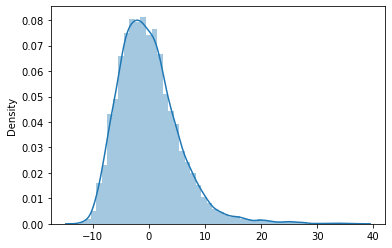

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
# Проверим ошибки на нормальность
# Тест Харке-Бера
from scipy.stats import jarque_bera
# Получаем остатки в регрессии
residuals = age - age_fitted 
stat_jb, p_jb = jarque_bera(residuals)
if p_jb > 0.05:
    print("Ошибки распределены нормально")
    print(stat_jb, p_jb)
else:
    print("Ошибки распределены не нормально")
    print(stat_jb, p_jb)
# Можно построить график плотности распределения
sns.distplot(residuals)

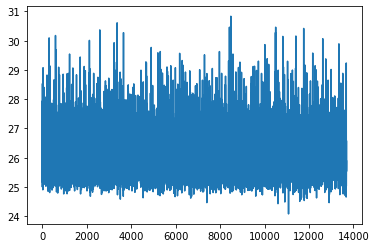

In [94]:
# Прогнозные значения объясняемой переменной
plt.plot(age_fitted);

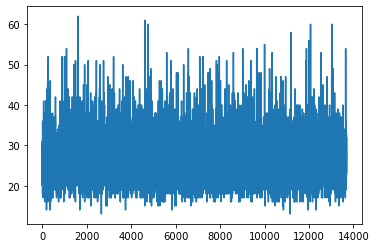

In [95]:
# Значения объясняемой переменной
plt.plot(age);

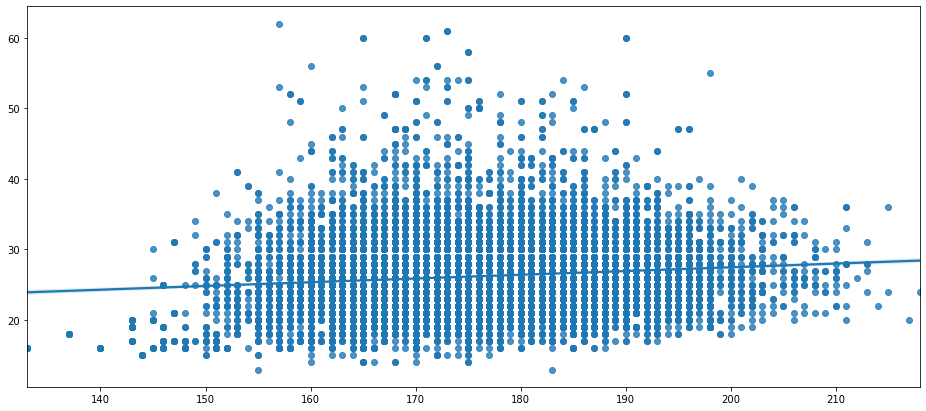

In [99]:
# Хороший способ посмотреть на качество подобранной прямой - через sns.regplot
plt.figure(figsize = (16,7))
sns.regplot(x = X_reg[:, 1], y = age);

In [110]:
# В парной регрессии коэффициент детерминации равен квадрату коэффициента корреляции между признаками
np.corrcoef(np.hstack([X_reg[:, 1].reshape(-1,1), age]).T)
import statsmodels.api as sm
model = sm.OLS(endog = age, exog = X_reg[:, :2]).fit()
np.round(0.10816749 ** 2, 5) == np.round(model.rsquared, 5)

array([[1.        , 0.10816749],
       [0.10816749, 1.        ]])

In [145]:
# Как правило, признаки имеют различные единицы измерения
# Из-за этого, мы не можем сравнивать напрямую коэффициенты, полученные при оценивании МНК
# Однако, мы можем их сравнить при стандартизации признаков 
# Другой способ - интерпретировать это как "вклады"
(np.multiply(X_reg, coefs_weight_height_male.T).sum(axis=0) / age_fitted.sum()) * 100

array([91.97897349, -5.68342621, 12.66281899,  1.04163374])

In [141]:
coefs_weight_height_male.T

array([[ 2.41057752e+01, -8.46210415e-03,  4.67598007e-02,
         5.00561872e-01]])

In [143]:
X_reg[0] * coefs_weight_height_male.T

array([[24.10577519, -1.43855771,  5.84497508,  0.        ]])

In [151]:
np.multiply(X_reg, coefs_weight_height_male.T).sum(axis=0)

array([329959.8507425 , -20388.38219143,  45425.83707587,   3736.69437308])

Про коэффициент детерминации.

Если нам важен прогноз, то чем выше $R^2$, тем лучше и мы пытаемся смоделировать так, чтобы он был как можно выше.

Однако, когда прогноз не является основной целью, то нам высокий $R^2$ не особо важен.

Еще момент. Такой $R^2$ - in-sample. Поэтому гораздо эффективнее стараться смотреть на $R^2$ - out-sample. 


# Часть 3. Метод ближайших соседей и бутстрап

**Задание 9**. Метод ближайших соседей (10 баллов). 

Создайте целевую переменную ***Male*** (мужчина или женщина) и примените метод ближайших соседей ( для определения пола спортсмена, используя признаки ***Height*** и ***Weight***. Для тренировочной выборки берете 2000 первых наблюдений, а для тестовой - 500 последних наблюдений. Естественно нельзя пользоваться готовыми статистическими пакетами.

In [170]:
# Целевая переменная на тренировочном наборе данных
y_train = X_reg[:2000 , 3].reshape(-1,1)
# Объясняющий признак на тренировочной и валидационной выборке

# Первые 2000 наблюдений
X_train = X_reg[:2000 , 1:3]
# Последние 500 наблюдений

X_test = X_reg[-500: , 1:3]

Эвклидово расстояния:

$\sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2}$

In [207]:
# Стандартизируем объясняющие признаки
X_train_knn_scaled = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_test_knn_scaled = (X_test - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)

In [216]:
%%time
def get_dist(x):
    ''' Создаем матрицу с попарными расстояниями между признаками на тестовой выборке
    и тренировочной'''
    return np.linalg.norm(x - X_train_knn_scaled, axis = 1)
dist_mat = np.apply_along_axis(get_dist, 1, X_test_knn_scaled)

# Берем 7 ближайших соседей (первые 7 индексов по убыванию в тренировочной выборке)
n = 7
dist_mat_sort_index = dist_mat.argpartition(kth = n, axis = 1)[:, 0:7]
# Заменяем в остортированной матрице расстояний индексы на соответствующие им значения целевой переменной

dist_target = np.apply_along_axis(lambda x: y_train[x], 1, dist_mat_sort_index)

# Предсказываем целевую переменную методом большинства
y_pred = np.round(dist_target.mean(axis = 1),0)
y_pred

CPU times: user 33.9 ms, sys: 7.17 ms, total: 41.1 ms
Wall time: 77 ms


array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],

**Задание 10**. Вес спринтеров (10 баллов). 

Вычислить 95% доверительный интервал с помощью бутстрапа для среднего значения веса спортсменов в беге на 100 метров для мужчин и для женщин.

In [189]:
male_100 = df[(df[:, 13]=="Athletics Men's 100 metres")][:, 5]
female_100 = df[(df[:, 13]=="Athletics Women's 100 metres")][:, 5]

In [194]:
import numpy as np
def get_bootstrap_samples(data, n_samples):
    # функция для генерации подвыборок с помощью бутстрэпа
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples
def stat_intervals(stat, alpha):
    # функция для интервальной оценки
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

# ставим seed для воспроизводимости результатов
np.random.seed(0)

# генерируем выборки с помощью бутстрэра и сразу считаем по каждой из них среднее
male_100_mean_weight = [np.mean(sample) 
                       for sample in get_bootstrap_samples(male_100, 10000)]
#  выводим интервальную оценку среднего
print("95% доверительный интервал для среднего веса мужчин спринтеров \n",  
      stat_intervals(male_100_mean_weight, 0.025)
     )
female_100_mean_weight = [np.mean(sample) 
                       for sample in get_bootstrap_samples(female_100, 10000)]
#  выводим интервальную оценку среднего
print("95% доверительный интервал для среднего веса женщин спринтеров \n",  
      stat_intervals(female_100_mean_weight, 0.025)
     )

95% доверительный интервал для среднего веса мужчин спринтеров 
 [72.48809524 75.82142857]
95% доверительный интервал для среднего веса женщин спринтеров 
 [58.0625 61.5875]
